In [2]:
import pandas as pd
import numpy as np

In [3]:
# Reading Data
df_resale = pd.read_csv('Landed_Housing_sorted.csv')
df_resale['Address'] = df_resale['address']

folder = 'Non-Landed Sorted Data'
df_cc = pd.read_csv('./Landed Sorted Data/CC_NEW.csv')
df_cc = df_cc.rename(columns={'0' : 'Address','1' : 'CC','2' : 'distance_cc'})
df_cc['distance_cc'] = df_cc['distance_cc'].str[:-2].astype(float)
df_cc = df_cc.drop(['CC'], axis=1)

df_hawker = pd.read_csv('./Landed Sorted Data/hawker_NEW.csv')
df_hawker = df_hawker.rename(columns={'0' : 'Address','1' : 'hawker','2' : 'distance_hawker'})
df_hawker['distance_hawker'] = df_hawker['distance_hawker'].str[:-2].astype(float)
df_hawker = df_hawker.drop(['hawker'], axis=1)

df_mrt = pd.read_csv('./Landed Sorted Data/MRT_NEW.csv')
df_mrt = df_mrt.rename(columns={'0' : 'Address','1' : 'MRT','2' : 'distance_mrt'})
df_mrt['distance_mrt'] = df_mrt['distance_mrt'].str[:-2].astype(float)
df_mrt = df_mrt.drop(['MRT'], axis=1)

df_npc = pd.read_csv('./Landed Sorted Data/npc_NEW.csv')
df_npc = df_npc.rename(columns={'0' : 'Address','1' : 'NPC','2' : 'distance_npc'})
df_npc['distance_npc']= df_npc['distance_npc'].str[:-2].astype(float)
df_npc = df_npc.drop(['NPC'], axis=1)

df_ps = pd.read_csv('./Landed Sorted Data/ps_NEW.csv')
df_ps = df_ps.rename(columns={'0' : 'Address','1' : 'PS','2' : 'distance_primary_school'})
df_ps['distance_primary_school'] = df_ps['distance_primary_school'].str[:-2].astype(float)
df_ps = df_ps.drop(['PS'], axis=1)

df_ss = pd.read_csv('./Landed Sorted Data/SS_NEW.csv')
df_ss = df_ss.rename(columns={'0' : 'Address','1' : 'SS','2' : 'distance_secondary_school'})
df_ss['distance_secondary_school'] = df_ss['distance_secondary_school'].str[:-2].astype(float)
df_ss = df_ss.drop(['SS'], axis=1)

df_sm = pd.read_csv('./Landed Sorted Data/supermarket_NEW.csv')
df_sm = df_sm.rename(columns={'0' : 'Address','1' : 'SM','2' : 'distance_supermarket'})
df_sm['distance_supermarket'] = df_sm['distance_supermarket'].str[:-2].astype(float)
df_sm = df_sm.drop(['SM'], axis=1)

df_city = pd.read_csv('./Landed Sorted Data/City_NEW.csv')
df_city = df_city.rename(columns={'0' : 'Address','1' : 'City','2' : 'distance_city'})
df_city['distance_city'] = df_city['distance_city'].str[:-2].astype(float)
df_city = df_city.drop(['City'], axis=1)

In [4]:
df_resale.head()

,Postal_header,Planning Area,Mature_Estate,Unnamed: 0,S/N,Project Name,Street Name,Type,Postal District,Market Segment,...,BUILDING,ADDRESS,POSTAL,X,Y,LATITUDE,LONGITUDE,LONGTITUDE,address,Address
0,2,Central,1,4731.0,1589.0,LANDED HOUSING DEVELOPMENT,NEIL ROAD,Terrace,2,RCR,...,JINRIKISHA STATION,1 NEIL ROAD JINRIKISHA STATION SINGAPORE 088804,88804.0,29169.348195,29180.758862,1.280175,103.843826,103.843826,NEIL ROAD,NEIL ROAD
1,2,Central,1,8659.0,1589.0,LANDED HOUSING DEVELOPMENT,NEIL ROAD,Terrace,2,RCR,...,JINRIKISHA STATION,1 NEIL ROAD JINRIKISHA STATION SINGAPORE 088804,88804.0,29169.348195,29180.758862,1.280175,103.843826,103.843826,NEIL ROAD,NEIL ROAD
2,3,Central,1,3853.0,688.0,LANDED HOUSING DEVELOPMENT,BARBARY WALK,Detached,3,RCR,...,SHEPHERD'S HILL ESTATE,1 BARBARY WALK SHEPHERD'S HILL ESTATE SINGAPOR...,149860.0,24942.747834,30295.263736,1.290254,103.805848,103.805848,BARBARY WALK,BARBARY WALK
3,3,Central,1,5417.0,2289.0,LANDED HOUSING DEVELOPMENT,MERINO CRESCENT,Detached,3,RCR,...,SHEPHERD'S HILL ESTATE,1 MERINO CRESCENT SHEPHERD'S HILL ESTATE SINGA...,149149.0,25066.453749,30464.286968,1.291783,103.806959,103.806959,MERINO CRESCENT,MERINO CRESCENT
4,3,Central,1,5634.0,2512.0,LANDED HOUSING DEVELOPMENT,MERINO CRESCENT,Semi-detached,3,RCR,...,SHEPHERD'S HILL ESTATE,1 MERINO CRESCENT SHEPHERD'S HILL ESTATE SINGA...,149149.0,25066.453749,30464.286968,1.291783,103.806959,103.806959,MERINO CRESCENT,MERINO CRESCENT


In [5]:
import re
df_resale['Tenure'].unique()
s = df_resale['Tenure'].str.findall('\d+')
def years_left(df):
    a = re.findall('\d+',df)
    if len(a)!= 0:
        left = int(a[0]) - (2021 - int(a[1]))
    else:
        left = 999999
    return left
df_resale['remaining_lease_yrs'] = df_resale['Tenure'].apply(years_left)
df_resale['remaining_lease_yrs']

0        999999
1        999999
2        999999
3        999999
4        999999
          ...  
12433       857
12434       857
12435    999999
12436       857
12437    999999
Name: remaining_lease_yrs, Length: 12438, dtype: int64

In [6]:
#The dictionary for cleaning up the categorical columns
cleanup_nums = {"flat_type_num":    {"Detached": 1, "Semi-detached": 2,"Terrace": 3, "Strata Detached": 4
                              , "Strata Semi-detached": 5, "Strata Terrace": 6},
                "Planning Area_num":    {"North": 1, "North-East": 2,"East": 3, "West": 4,
                                   "Central": 5},
                
               
               }
#To convert the columns to numbers using replace:

df_resale['flat_type_num']  = df_resale['Type']
df_resale['Planning Area_num']  = df_resale['Planning Area']
df_resale = df_resale.replace(cleanup_nums)
df_resale.head()




,Postal_header,Planning Area,Mature_Estate,Unnamed: 0,S/N,Project Name,Street Name,Type,Postal District,Market Segment,...,X,Y,LATITUDE,LONGITUDE,LONGTITUDE,address,Address,remaining_lease_yrs,flat_type_num,Planning Area_num
0,2,Central,1,4731.0,1589.0,LANDED HOUSING DEVELOPMENT,NEIL ROAD,Terrace,2,RCR,...,29169.348195,29180.758862,1.280175,103.843826,103.843826,NEIL ROAD,NEIL ROAD,999999,3,5
1,2,Central,1,8659.0,1589.0,LANDED HOUSING DEVELOPMENT,NEIL ROAD,Terrace,2,RCR,...,29169.348195,29180.758862,1.280175,103.843826,103.843826,NEIL ROAD,NEIL ROAD,999999,3,5
2,3,Central,1,3853.0,688.0,LANDED HOUSING DEVELOPMENT,BARBARY WALK,Detached,3,RCR,...,24942.747834,30295.263736,1.290254,103.805848,103.805848,BARBARY WALK,BARBARY WALK,999999,1,5
3,3,Central,1,5417.0,2289.0,LANDED HOUSING DEVELOPMENT,MERINO CRESCENT,Detached,3,RCR,...,25066.453749,30464.286968,1.291783,103.806959,103.806959,MERINO CRESCENT,MERINO CRESCENT,999999,1,5
4,3,Central,1,5634.0,2512.0,LANDED HOUSING DEVELOPMENT,MERINO CRESCENT,Semi-detached,3,RCR,...,25066.453749,30464.286968,1.291783,103.806959,103.806959,MERINO CRESCENT,MERINO CRESCENT,999999,2,5


In [7]:
merged = pd.merge(df_resale,df_cc, on=['Address'], how="outer")
merged = pd.merge(merged,df_hawker, on=['Address'], how="outer")
merged = pd.merge(merged,df_mrt, on=['Address'], how="outer")
merged = pd.merge(merged,df_npc, on=['Address'], how="outer")
merged = pd.merge(merged,df_ps, on=['Address'], how="outer")
merged = pd.merge(merged,df_ss, on=['Address'], how="outer")
merged = pd.merge(merged,df_sm, on=['Address'], how="outer")
merged = pd.merge(merged,df_city, on=['Address'], how="outer")
#merged = pd.merge(merged,df_meta, on=['Address'], how="outer")
merged = merged.dropna()
#merged.to_csv('Complete_dataset_landed.csv')


In [8]:
merged = merged.rename(columns={"Area (Sqft)": "floor_area_sqm"})
merged['resale_price'] = merged['Price ($)']/merged['No. of Units']

In [9]:
dataset_features = merged[['resale_price', 'Postal District','flat_type_num' ,'floor_area_sqm', 'Planning Area_num', 'remaining_lease_yrs', 
                    'distance_secondary_school','distance_primary_school', 'distance_mrt', 'distance_supermarket', 'distance_hawker',
                    'distance_city', 'distance_npc', 'distance_cc','Mature_Estate']]
print(len(dataset_features))
# Only "y varable" 
resale_p = dataset_features['resale_price']

# All other indepdendent variables
X = dataset_features[[ 'Postal District','flat_type_num' ,'floor_area_sqm', 'Planning Area_num', 'remaining_lease_yrs', 
                    'distance_secondary_school','distance_primary_school', 'distance_mrt', 'distance_supermarket', 'distance_hawker',
                    'distance_city', 'distance_npc', 'distance_cc','Mature_Estate']]
dataset_features.head()

12438


,resale_price,Postal District,flat_type_num,floor_area_sqm,Planning Area_num,remaining_lease_yrs,distance_secondary_school,distance_primary_school,distance_mrt,distance_supermarket,distance_hawker,distance_city,distance_npc,distance_cc,Mature_Estate
0,6000000.0,2,3,3193.0,5,999999,0.960972,0.684728,0.463179,0.444501,0.104015,1.732091,0.525199,0.145201,1
1,6000000.0,2,3,3193.0,5,999999,0.960972,0.684728,0.463179,0.444501,0.104015,1.732091,0.525199,0.145201,1
2,6380000.0,3,1,5199.0,5,999999,0.901405,0.776450,0.509438,0.203843,0.451131,5.202830,0.391794,0.984172,1
3,6380000.0,3,1,5199.0,5,999999,0.901405,0.776450,0.509438,0.203843,0.451131,5.202830,0.391794,0.984172,1
4,5550000.0,3,1,4674.0,5,999999,0.733715,0.579922,0.360550,0.412032,0.557248,5.071424,0.591292,0.892015,1


In [10]:
dataset_features.dtypes

resale_price                 float64
Postal District                int64
flat_type_num                  int64
floor_area_sqm               float64
Planning Area_num              int64
remaining_lease_yrs            int64
distance_secondary_school    float64
distance_primary_school      float64
distance_mrt                 float64
distance_supermarket         float64
distance_hawker              float64
distance_city                float64
distance_npc                 float64
distance_cc                  float64
Mature_Estate                  int64
dtype: object

In [11]:
#Have correlation analysis for resale price with all variables:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


corrMatrix = dataset_features.corr()
test = corrMatrix.iloc[[0]]
test = test.iloc[: , 1:]
print(test)

"""plt.subplots(figsize=(12,9))
sns.heatmap(corrMatrix, xticklabels=corrMatrix.columns, yticklabels=corrMatrix.columns, cmap='coolwarm', annot=True)"""

              Postal District  flat_type_num  floor_area_sqm  \
resale_price        -0.309468       -0.41847        0.884973   

              Planning Area_num  remaining_lease_yrs  \
resale_price           0.032577             0.142395   

              distance_secondary_school  distance_primary_school  \
resale_price                    0.11749                 0.163127   

              distance_mrt  distance_supermarket  distance_hawker  \
resale_price      -0.00604              0.009245        -0.018803   

              distance_city  distance_npc  distance_cc  Mature_Estate  
resale_price      -0.233682      0.099284     0.272612            NaN  


"plt.subplots(figsize=(12,9))\nsns.heatmap(corrMatrix, xticklabels=corrMatrix.columns, yticklabels=corrMatrix.columns, cmap='coolwarm', annot=True)"

(array([0.5]), [Text(0, 0.5, 'resale_price')])

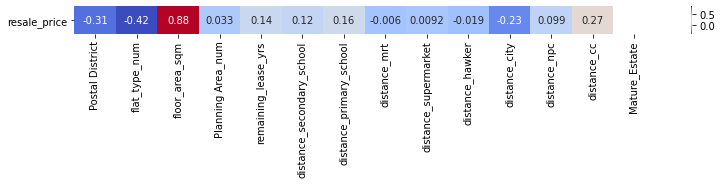

In [12]:
plt.subplots(figsize=(13,0.5))
sns.heatmap(test, xticklabels=test.columns, yticklabels=test.index, cmap='coolwarm', annot=True)
plt.yticks(rotation = 'horizontal')

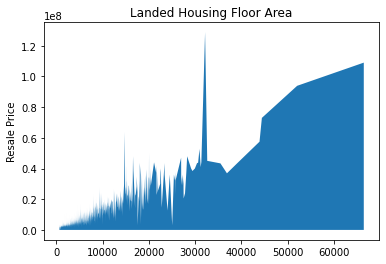

In [14]:
floor_area = merged.sort_values(by=['floor_area_sqm'])

plt.fill_between(floor_area['floor_area_sqm'], floor_area['resale_price'], lw=2)
plt.ylabel('Resale Price')
plt.title('Landed Housing Floor Area')
plt.show()

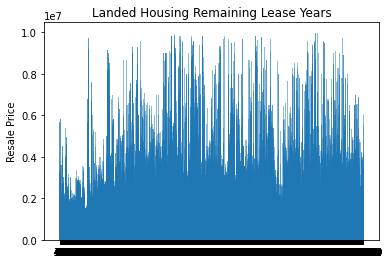

In [15]:
remaining = merged.sort_values(by=['remaining_lease_yrs'])
remaining = remaining.loc[remaining['remaining_lease_yrs']>30]
remaining = remaining.loc[remaining['resale_price']<10000000]

y_pos = np.arange(len(remaining))
plt.bar(y_pos, remaining['resale_price'], align='center', alpha=0.5,width=20)
plt.ylabel('Resale Price')
plt.xticks(y_pos, remaining['remaining_lease_yrs'])
plt.title('Landed Housing Remaining Lease Years')
plt.show()



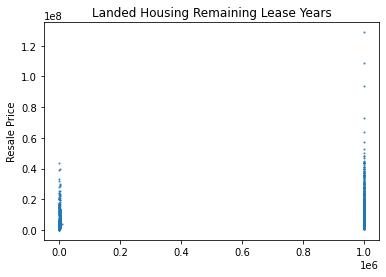

In [21]:
remaining = merged.sort_values(by=['remaining_lease_yrs'])
plt.ylabel('Resale Price')
plt.scatter(remaining['remaining_lease_yrs'], remaining['resale_price'],s=1, alpha=0.5)
plt.title('Landed Housing Remaining Lease Years')
plt.show()

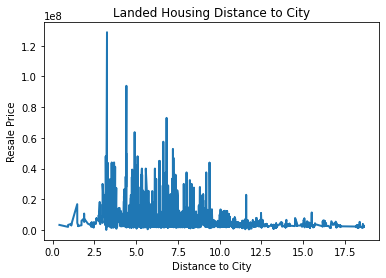

In [20]:
city = merged.sort_values(by=['distance_city'])

plt.plot(city['distance_city'], city['resale_price'], lw=2)
plt.ylabel('Resale Price')
plt.title('Landed Housing Distance to City')
plt.xlabel('Distance to City')
plt.show()

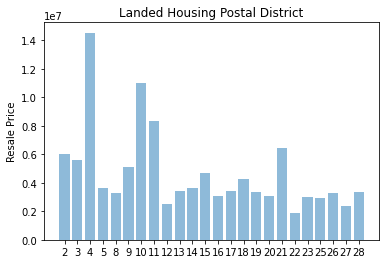

In [19]:
postal_district = merged.groupby(by = ['Postal District'])['resale_price'].mean().reset_index()
y_pos = np.arange(len(postal_district))
plt.bar(y_pos, postal_district['resale_price'], align='center', alpha=0.5)
plt.ylabel('Resale Price')
plt.xticks(y_pos, postal_district['Postal District'])
plt.title('Landed Housing Postal District')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor

np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, resale_p, test_size=.3, random_state=0)
Models = ["OLS", "AdaBoost", "Decision Tree"]
MSE_lst = []

# OLS: 
regr = linear_model.LinearRegression() # Create linear regression object
np.random.seed(100)
regr.fit(X_train, y_train) # Train the model using the training sets
y_pred_ols = regr.predict(X_test) # Make predictions using the testing set
MSE_ols = mean_squared_error(y_test, y_pred_ols) # performance statistic
MSE_lst.append(MSE_ols)

# Boosting
adaboosting = AdaBoostRegressor()
adaboosting.fit(X=X_train, y=y_train)
y_pred_boosting = adaboosting.predict(X=X_test)
MSE_adaboost = mean_squared_error(y_test, y_pred_boosting)
MSE_lst.append(MSE_adaboost)

# Bagging
bagging = BaggingRegressor(DecisionTreeRegressor())
bagging.fit(X=X_train, y=y_train)
y_pred_dt = bagging.predict(X=X_test)
MSE_bag = mean_squared_error(y_test, y_pred_dt)
MSE_lst.append(MSE_bag)


3732


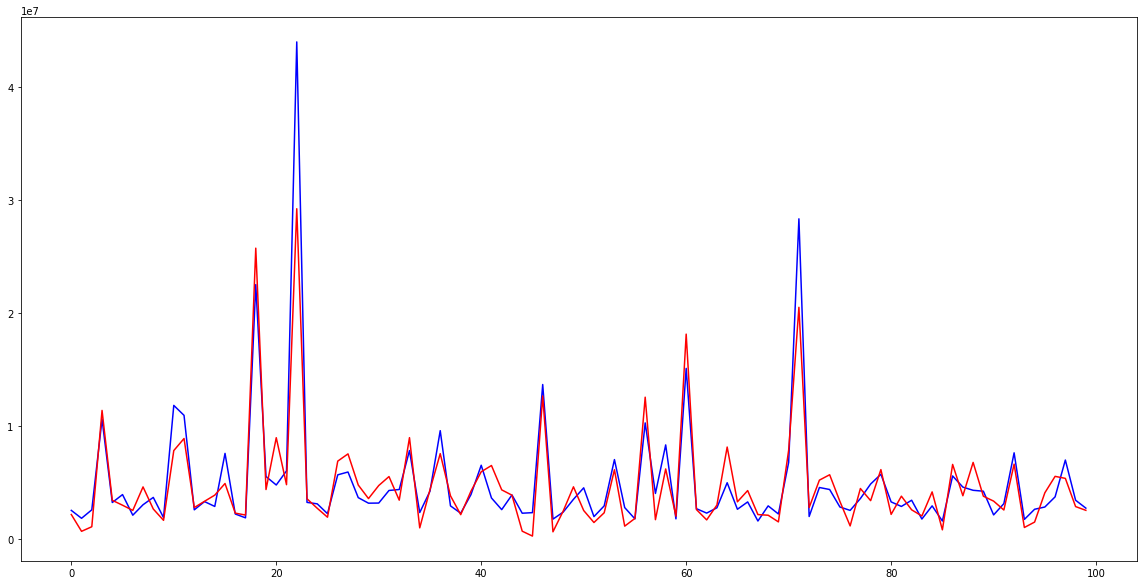

In [13]:
import matplotlib.pyplot as plt 
print(len(y_test))
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(range(len(y_test[:100])), y_test[:100], '-b',label='Actual')
ax.plot(range(len(y_pred_ols[:100])), y_pred_ols[:100], 'r', label='Predicted')
plt.show()

3732


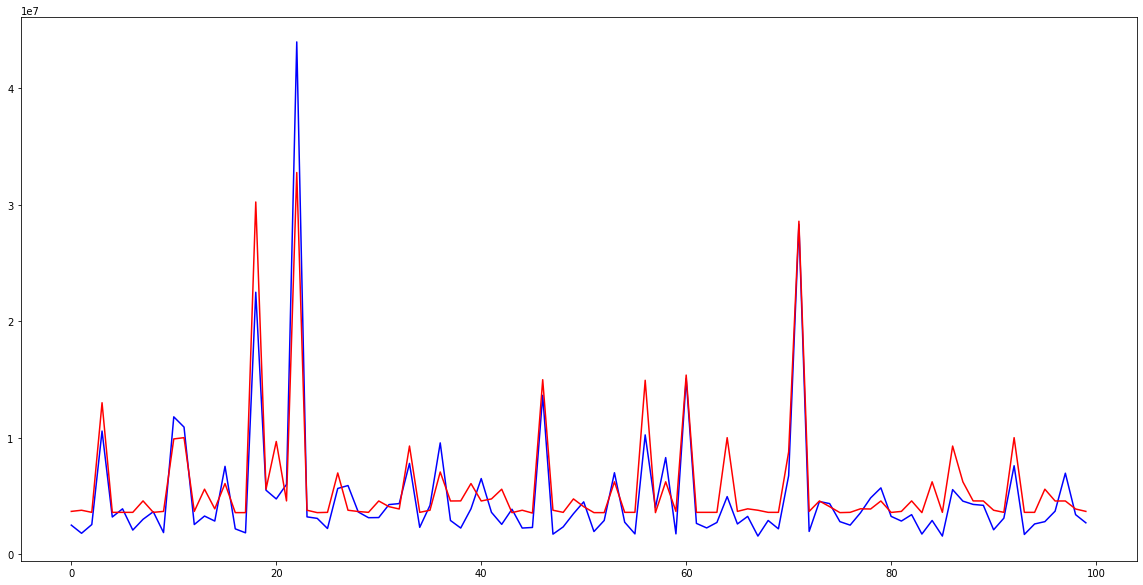

In [14]:
import matplotlib.pyplot as plt 
print(len(y_test))
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(range(len(y_test[:100])), y_test[:100], '-b',label='Actual')
ax.plot(range(len(y_pred_boosting[:100])), y_pred_boosting[:100], 'r', label='Predicted')
plt.show()

3732


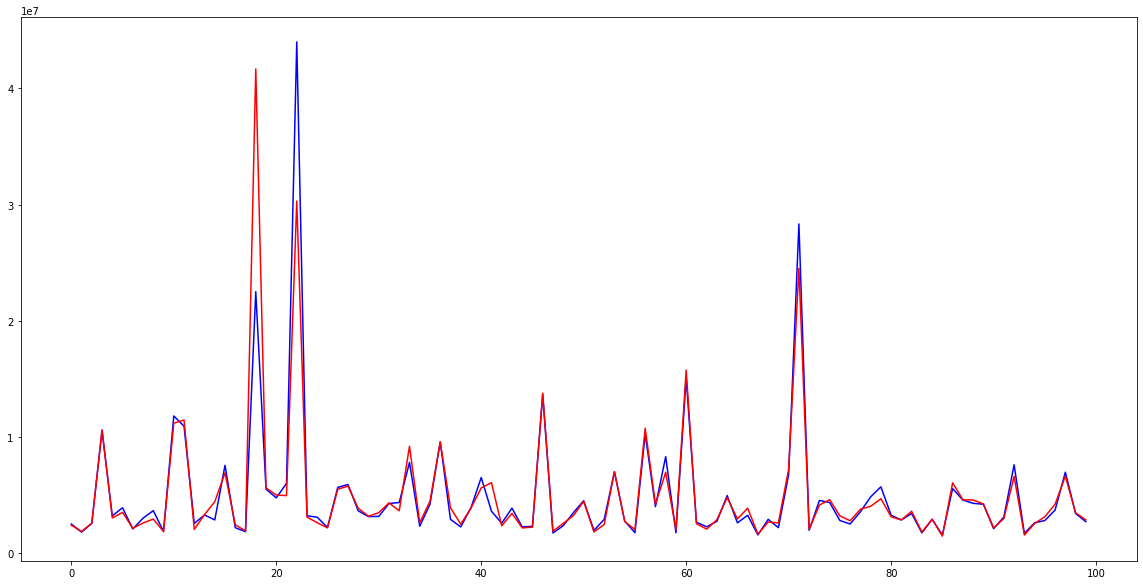

In [15]:
import matplotlib.pyplot as plt 
print(len(y_test))
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(range(len(y_test[:100])), y_test[:100], '-b',label='Actual')
ax.plot(range(len(y_pred_dt[:100])), y_pred_dt[:100], 'r', label='Predicted')
plt.show()

In [16]:
y_pred_df_ols = pd.DataFrame(y_pred_dt, columns= ['y_pred'])

print(len(y_pred_df_ols))
print(len(X_test))
pred_res1 = pd.concat([X_test,y_test], axis=1)
print(len(pred_res1))
pred_res1 = pred_res1.reset_index(drop=True)
pred_res2 = pd.concat([pred_res1,y_pred_df_ols], axis=1)
pred_res2

3732
3732
3732


,Postal District,Type_no,floor_area_sqm,Planning Area_no,remaining_lease_yrs,distance_secondary_school,distance_primary_school,distance_mrt,distance_supermarket,distance_hawker,distance_city,distance_npc,distance_cc,abs_price,y_pred
0,19,3,1611.0,5,999999,0.581739,0.513331,0.920067,0.720204,1.130771,7.640185,0.890653,1.106044,2500000.0,2.396219e+06
1,27,3,1837.0,5,86,2.694135,2.070671,2.175252,2.234502,3.404212,18.590388,2.697640,2.497854,1800000.0,1.861148e+06
2,23,3,1685.0,5,999999,0.800555,0.858012,0.689781,0.649104,3.389959,14.191914,2.559632,0.947224,2550000.0,2.565800e+06
3,11,1,7098.0,5,999999,0.384926,0.777393,0.287378,0.439977,1.879686,7.324239,1.793565,2.832796,10580000.0,1.058000e+07
4,28,6,3584.0,5,999999,1.165658,0.957408,1.844276,0.876456,1.699879,9.653134,1.841331,1.173944,3198000.0,3.021267e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,16,6,2379.0,5,73,0.781538,0.870669,0.697890,0.180623,1.298705,11.597713,1.323127,1.434699,1330000.0,1.475439e+06
3728,15,3,1789.0,5,999999,0.776901,0.301974,0.769154,0.735890,1.259847,7.785663,0.778960,0.947392,3300000.0,3.207250e+06
3729,14,3,1664.0,5,999999,0.636739,0.435943,0.395520,0.586572,0.577595,4.148173,0.324300,1.151827,2300000.0,2.418690e+06
3730,19,3,1615.0,5,89,0.902064,0.715261,1.332646,0.490809,0.660272,8.083324,1.114947,0.809190,2520000.0,2.469493e+06


In [17]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              abs_price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     2829.
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:33:37   Log-Likelihood:            -1.4055e+05
No. Observations:                8706   AIC:                         2.811e+05
Df Residuals:                    8692   BIC:                         2.812e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

c:\python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
